<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Covnets_Basics_with_Dropout_Dogs_vs_Cats_Small_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Generator allows you to loop over the training data in pieces(batches), avoiding large memory consumption when you load the entire training set at once

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/training_2000', target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator=validation_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/val_1000', target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Generators are objects that act as an iterator (for loop). However the generator yields batches indefinitely and we need to break the loop at some point. In our case the train and val generators will yield batches of inputs and targets indefinitely. However we need to know how many samples to draw from the dataset before declaring the epoch is over. The steps_per_epoch argument takes care of this. In our case we have 2000 inputs and it will take 100 x 20 steps to finish 1 epoch.

In [8]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=20)




Epoch 1/30





100/100 [==============================] - 680s 7s/step - loss: 0.6951 - acc: 0.5220 - val_loss: 0.6852 - val_acc: 0.5075
Epoch 2/30
100/100 [==============================] - 148s 1s/step - loss: 0.6748 - acc: 0.5760 - val_loss: 0.6698 - val_acc: 0.5750
Epoch 3/30
100/100 [==============================] - 107s 1s/step - loss: 0.6471 - acc: 0.6195 - val_loss: 0.6365 - val_acc: 0.6450
Epoch 4/30
100/100 [==============================] - 105s 1s/step - loss: 0.6294 - acc: 0.6450 - val_loss: 0.6298 - val_acc: 0.6475
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.6013 - acc: 0.6705 - val_loss: 0.5929 - val_acc: 0.6600
Epoch 6/30
100/100 [==============================] - 106s 1s/step - loss: 0.5734 - acc: 0.6975 - val_loss: 0.5966 - val_acc: 0.6650
Epoch 7/30
100/100 [==============================] - 106s 1s/step - loss: 0.5539 - acc: 0.7160 - val_loss: 0.5722 - val_acc: 0.7025
Epoch 8/30
100/100 [==============================] - 104s 1s

In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [0]:
epochs=range(1, len(acc)+1)

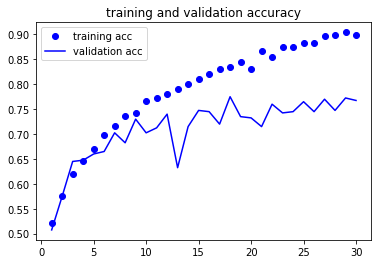

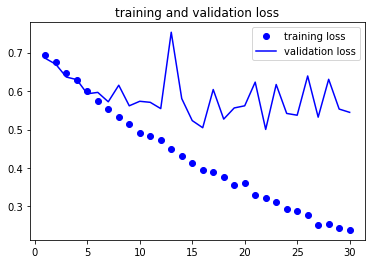

In [11]:
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()